## Project 287– Resume Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# load the dataset
data = pd.read_csv('allresume.csv')
data

,Raw_Details,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resumes
1,Classification: Internal\n\nClassification: In...,PeopleSoft resumes
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resumes
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resumes
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resumes
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resumes
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resumes
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resumes
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resumes
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resumes


In [3]:
# Dimensions of the dataset
print(data.shape) 

(52, 2)


In [4]:
# First few rows of the dataset
print(data.head()) 

                                         Raw_Details            Category
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft resumes
1  Classification: Internal\n\nClassification: In...  PeopleSoft resumes
2  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft resumes
3  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft resumes
4  PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft resumes


In [5]:
print(data.info())  # General information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category     52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes
None


In [6]:
print(data.describe())  # Summary statistics of numerical columns

                                              Raw_Details           Category
count                                                  52                 52
unique                                                 52                  4
top     Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  Reactjs Developer
freq                                                    1                 20


C:\Users\Sarth Naik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


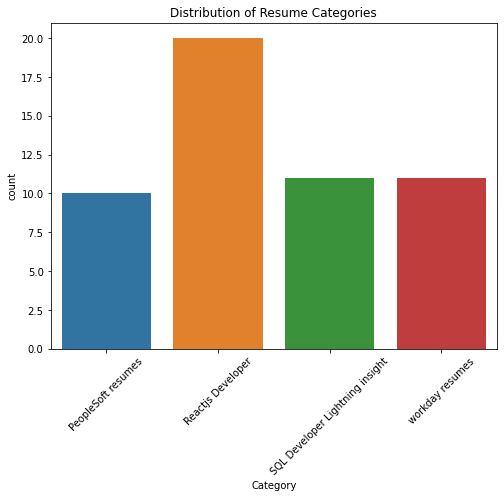

In [7]:
# Visualize the distribution of target labels (resume categories)
plt.figure(figsize=(8, 6))
sns.countplot(data['Category'])
plt.title('Distribution of Resume Categories')
plt.xticks(rotation=45)
plt.show()

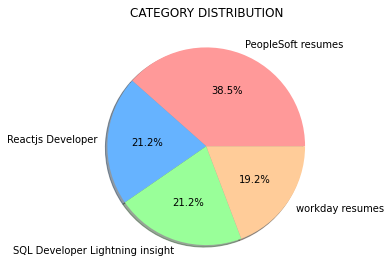

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(10,10))
the_grid = GridSpec(2, 2)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [9]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Reactjs Developer                  20
SQL Developer Lightning insight    11
workday resumes                    11
PeopleSoft resumes                 10
Name: Category, dtype: int64


In [10]:
# Create a word cloud to visualize common words in resume text
#text = " ".join(resume for resume in data['Raw_Details'])
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.title('Common Words in Resumes')
#plt.show()

<Axes: xlabel='count', ylabel='Category'>

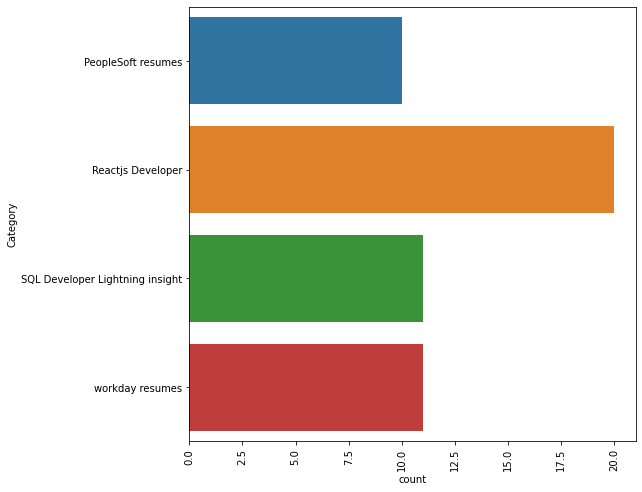

In [11]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

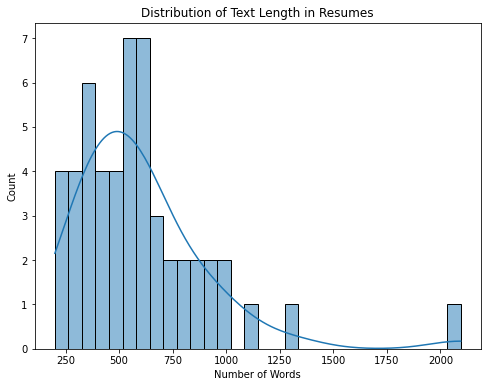

In [12]:
# Visualize the distribution of text lengths (number of words)
data['text_length'] = data['Raw_Details'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length in Resumes')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

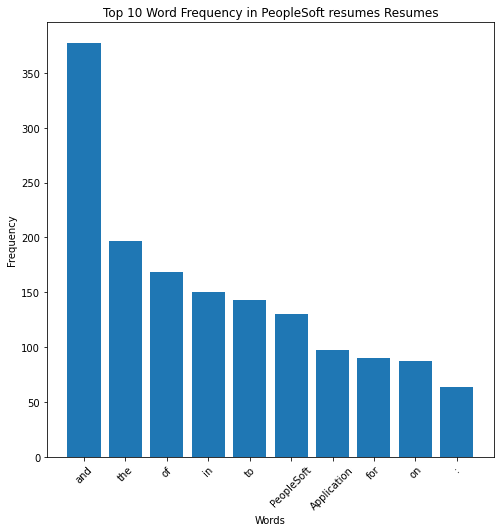

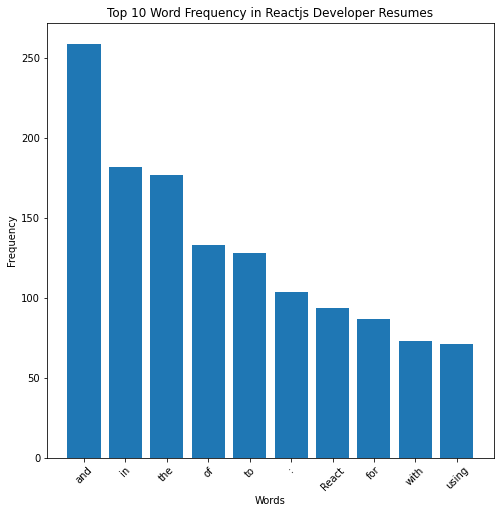

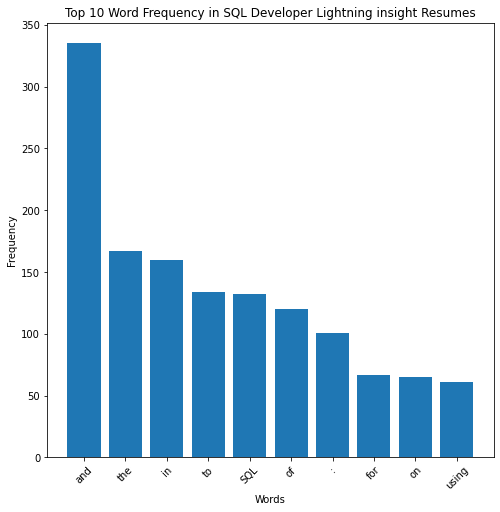

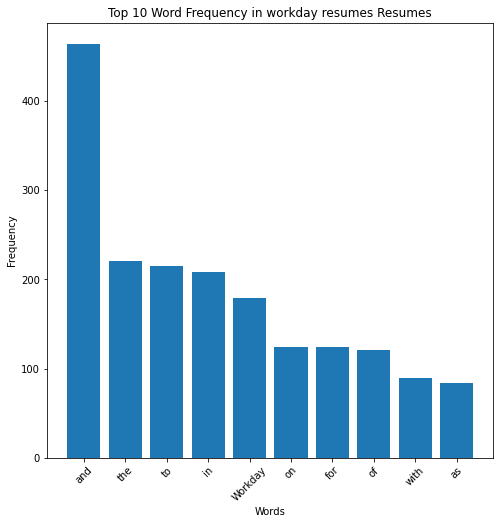

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

word_freq = Counter()

# Assuming 'data' is your DataFrame with resume data
for category in data['Category'].unique():
    text = " ".join(data[data['Category'] == category]['Raw_Details'])
    word_counter = Counter(text.split())
    # Get the top 10 most common words
    top_10_words = dict(word_counter.most_common(10))
    word_freq[category] = top_10_words

for category, freq in word_freq.items():
    plt.figure(figsize=(8, 8))
    plt.bar(freq.keys(), freq.values())
    plt.title(f'Top 10 Word Frequency in {category} Resumes')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


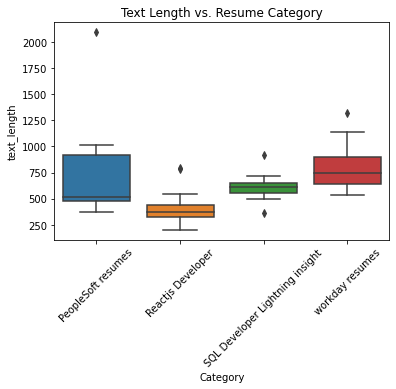

In [14]:
sns.boxplot(x='Category', y='text_length', data=data)
plt.title('Text Length vs. Resume Category')
plt.xticks(rotation=45)
plt.show()

In [15]:
#Data Preprocessing
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
data['cleaned_resume'] = data.Raw_Details.apply(lambda x: cleanResume(x))

In [16]:
import nltk
from nltk.corpus import stopwords
import string


# Initialize NLTK stopwords and punctuation
oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = data['Raw_Details'].values
cleanedSentences = ""


for i in range(min(len(Sentences), 160)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[('using', 247), ('SQL', 202), ('Workday', 188), ('Experience', 173), ('PeopleSoft', 162), ('Application', 139), ('experience', 134), ('Project', 131), ('Server', 126), ('data', 125), ('React', 123), ('business', 113), ('2', 106), ('8', 103), ('various', 95), ('like', 94), ('knowledge', 94), ('reports', 94), ('HCM', 92), ('Web', 87), ('Involved', 85), ('Good', 79), ('I', 75), ('Reports', 75), ('Developer', 75), ('system', 74), ('Worked', 71), ('EIB', 71), ('1', 70), ('People', 68), ('9', 68), ('process', 68), ('application', 67), ('working', 65), ('creating', 65), ('Responsibilities', 64), ('Role', 62), ('Tools', 62), ('Created', 61), ('JS', 61), ('Oracle', 59), ('support', 59), ('new', 59), ('Windows', 58), ('issues', 56), ('Client', 56), ('Core', 55), ('Process', 55), ('3', 55), ('integrations', 55)]


In [17]:
#nltk.download('stopwords')

In [18]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

### MODELS

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['Raw_Details'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(41, 1500)
(11, 1500)


In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.93
Accuracy of KNeighbors Classifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11




In [21]:
# Split the data into training and testing sets
X = data['Raw_Details']  # Resume text
y = data['Category']     # Resume category labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [22]:
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_tfidf, y_train)
xgb_predictions = xgb_classifier.predict(X_test_tfidf)

# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)

# Naive Bayes (MultinomialNB) Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_classifier.fit(X_train_tfidf, y_train)
knn_predictions = knn_classifier.predict(X_test_tfidf)


# Evaluate the models
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Classification Report:\n{report}\n")

evaluate_model(svm_predictions, "SVM")
evaluate_model(rf_predictions, "Random Forest")
evaluate_model(xgb_predictions, "XGBoost")
evaluate_model(lr_predictions, "Logistic Regression")
evaluate_model(nb_predictions, "Naive Bayes")
evaluate_model(knn_predictions, "K-Nearest Neighbors")

SVM Accuracy: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


XGBoost Accuracy

C:\Users\Sarth Naik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy for each classifier
svm_train_accuracy = accuracy_score(y_train, svm_classifier.predict(X_train_tfidf))
rf_train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train_tfidf))
xgb_train_accuracy = accuracy_score(y_train, xgb_classifier.predict(X_train_tfidf))
lr_train_accuracy = accuracy_score(y_train, lr_classifier.predict(X_train_tfidf))
nb_train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train_tfidf))
knn_train_accuracy = accuracy_score(y_train, knn_classifier.predict(X_train_tfidf))

# Create a table to display training and testing accuracies
import pandas as pd

data = {
    'Classifier': ['SVM', 'Random Forest', 'XGBoost', 'Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors'],
    'Training Accuracy': [svm_train_accuracy, rf_train_accuracy, xgb_train_accuracy, lr_train_accuracy, nb_train_accuracy, knn_train_accuracy],
    'Testing Accuracy': [accuracy_score(y_test, svm_predictions), accuracy_score(y_test, rf_predictions),
                          accuracy_score(y_test, xgb_predictions), accuracy_score(y_test, lr_predictions),
                          accuracy_score(y_test, nb_predictions), accuracy_score(y_test, knn_predictions)]
}

accuracy_table = pd.DataFrame(data)
print(accuracy_table)


            Classifier  Training Accuracy  Testing Accuracy
0                  SVM            1.00000               1.0
1        Random Forest            1.00000               1.0
2              XGBoost            1.00000               1.0
3  Logistic Regression            1.00000               1.0
4          Naive Bayes            0.97561               1.0
5  K-Nearest Neighbors            0.95122               1.0


C:\Users\Sarth Naik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


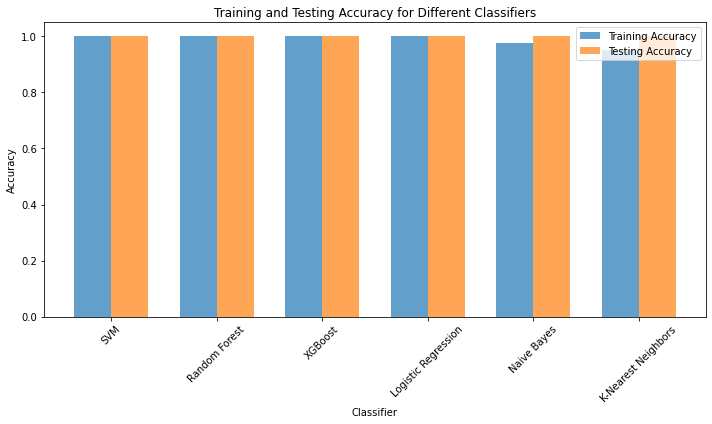

In [24]:
accuracy_table = pd.DataFrame(data)

bar_width = 0.35


x_indices = np.arange(len(accuracy_table))

plt.figure(figsize=(10, 6))
plt.bar(x_indices - bar_width/2, accuracy_table['Training Accuracy'], bar_width, label='Training Accuracy', alpha=0.7)
plt.bar(x_indices + bar_width/2, accuracy_table['Testing Accuracy'], bar_width, label='Testing Accuracy', alpha=0.7)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different Classifiers')
plt.legend()
plt.xticks(x_indices, accuracy_table['Classifier'], rotation=45)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Define the classifiers
classifiers = [
    ("SVM", SVC(kernel='linear')),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBoost", xgb.XGBClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Naive Bayes", MultinomialNB()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5))
]

# Perform 5-fold cross-validation for each classifier
for name, classifier in classifiers:
    cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean Accuracy: {cv_scores.mean():.2f}\n")


SVM Cross-Validation Scores: [0.88888889 0.875      1.         1.         1.        ]
SVM Mean Accuracy: 0.95

Random Forest Cross-Validation Scores: [0.88888889 0.875      1.         1.         0.75      ]
Random Forest Mean Accuracy: 0.90

XGBoost Cross-Validation Scores: [0.88888889 0.75       0.875      1.         0.75      ]
XGBoost Mean Accuracy: 0.85

Logistic Regression Cross-Validation Scores: [0.77777778 0.875      1.         1.         0.875     ]
Logistic Regression Mean Accuracy: 0.91

Naive Bayes Cross-Validation Scores: [0.66666667 0.875      0.75       1.         0.625     ]
Naive Bayes Mean Accuracy: 0.78

K-Nearest Neighbors Cross-Validation Scores: [0.77777778 0.875      1.         0.875      1.        ]
K-Nearest Neighbors Mean Accuracy: 0.91



C:\Users\Sarth Naik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sarth Naik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

In [26]:
from pickle import dump

In [27]:
#dump(svm_classifier, open('SVMP.pkl','wb'))

In [31]:
print(Category)

NameError: name 'Category' is not defined

In [29]:
dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl','wb'))